In [1]:
from google.colab import drive

# Monter Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd
import os
import shutil

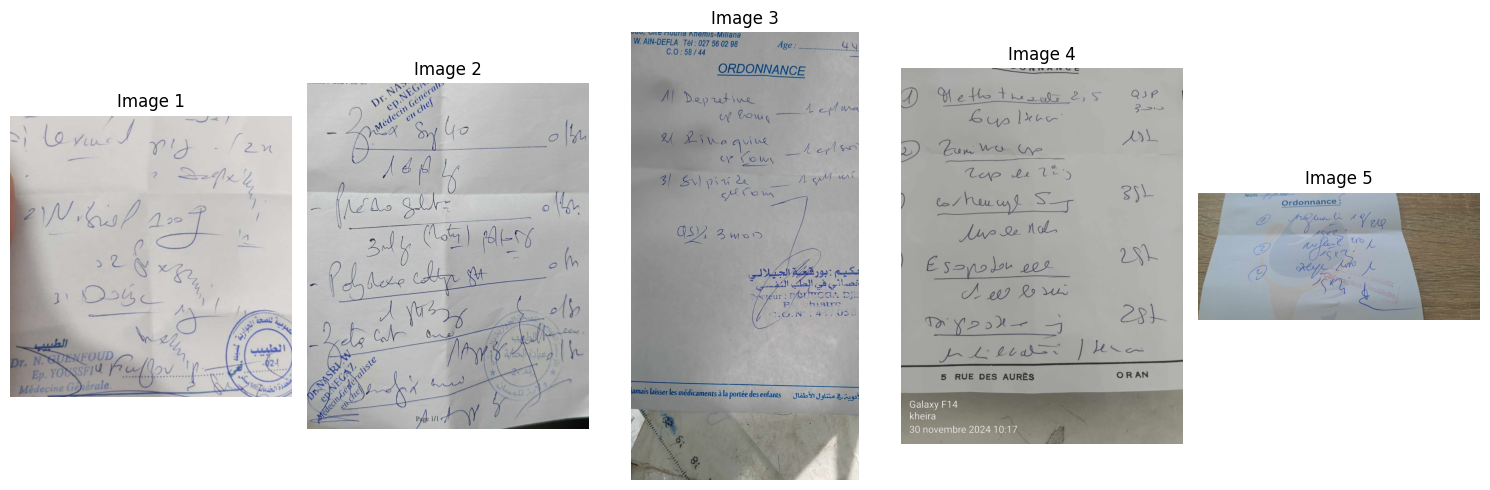

Nombre d'images trouvées : 2334
['Ordonnances_278.jpg', 'Ordonnances_497.jpg', 'Ordonnances_542.jpg', 'Ordonnances_129.jpg', 'Ordonnances_371.jpg', 'Ordonnances_428.jpg', 'Ordonnances_688.jpg', 'Ordonnances_438.jpg', 'Ordonnances_757.jpg', 'Ordonnances_524.jpg', 'Ordonnances_718.jpg', 'Ordonnances_173.jpg', 'Ordonnances_403.jpg', 'Ordonnances_572.jpg', 'Ordonnances_379.jpg', 'Ordonnances_366.jpg', 'Ordonnances_528.jpg', 'Ordonnances_698.jpg', 'Ordonnances_148.jpg', 'Ordonnances_140.jpg', 'Ordonnances_248.jpg', 'Ordonnances_367.jpg', 'Ordonnances_673.jpg', 'Ordonnances_574.jpg', 'Ordonnances_337.jpg', 'Ordonnances_577.jpg', 'Ordonnances_711.jpg', 'Ordonnances_256.jpg', 'Ordonnances_95.jpg', 'Ordonnances_300.jpg', 'Ordonnances_155.jpg', 'Ordonnances_217.jpg', 'Ordonnances_501.jpg', 'Ordonnances_734.jpg', 'Ordonnances_358.jpg', 'Ordonnances_323.jpg', 'Ordonnances_641.jpg', 'Ordonnances_150.jpg', 'Ordonnances_508.jpg', 'Ordonnances_687.jpg', 'Ordonnances_692.jpg', 'Ordonnances_516.jpg', 'O

In [18]:
import os
import matplotlib.pyplot as plt
import cv2

# 📍 Chemin vers le dossier Ordonnances
ordonnances_path = '/content/drive/MyDrive/Ordonnances'

# 📥 Lister toutes les images du dossier
image_files = [f for f in os.listdir(ordonnances_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# 🖼️ Sélectionner quelques images à afficher
num_images_to_show = 5  # tu peux changer à 10 si tu veux
selected_images = image_files[:num_images_to_show]

# 📈 Afficher les images
plt.figure(figsize=(15, 5))
for idx, img_name in enumerate(selected_images):
    img_path = os.path.join(ordonnances_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Conversion BGR -> RGB pour matplotlib

    plt.subplot(1, num_images_to_show, idx + 1)
    plt.imshow(img)
    plt.title(f"Image {idx+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()
print(f"Nombre d'images trouvées : {len(image_files)}")
print(image_files)

In [19]:
# 📦 Installer Tesseract et pytesseract
!apt install tesseract-ocr -y
!pip install pytesseract fuzzywuzzy[speedup] python-Levenshtein

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [23]:
# Installer tesseract-ocr-fra (modèle français)
!apt-get install tesseract-ocr-fra -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-fra
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 527 kB of archives.
After this operation, 1,145 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-fra all 1:4.00~git30-7274cfa-1.1 [527 kB]
Fetched 527 kB in 1s (714 kB/s)
Selecting previously unselected package tesseract-ocr-fra.
(Reading database ... 126333 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-fra_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-fra (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-fra (1:4.00~git30-7274cfa-1.1) ...


In [24]:
text = pytesseract.image_to_string(img, lang='fra')

In [27]:
# 📦 Installation de PaddleOCR et PaddlePaddle
!pip install paddleocr
!pip install paddlepaddle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 17.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=835319bbf44742d929690f52b1ece89e24ce0b6f2de684303a22e8814df36b1d
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
   

In [32]:
import pandas as pd
import cv2
import pytesseract
import os

# 📥 Charger les annotations
annotations_path = '/content/drive/MyDrive/Dataset_Pi/annotations_Ordonnances.csv'
df = pd.read_csv(annotations_path)

# 📍 Chemin des images
images_folder = '/content/drive/MyDrive/Dataset_Pi/Ordonnances'  # adapte si besoin

# 📋 Liste spécialités connues
specialites_connues = [
    'Médecine Générale', 'Pédiatre', 'Dermatologue', 'Cardiologue',
    'Ophtalmologue', 'Gynécologue', 'Psychiatre', 'ORL', 'Neurologue'
]

# 📋 Filtrer seulement les "specialite medecin"
df_specialite = df[df['class'] == 'specialite medecin']

resultats = []

for idx, row in df_specialite.iterrows():
    filename = row['filename']
    img_path = os.path.join(images_folder, filename)

    # Charger l'image
    img = cv2.imread(img_path)

    if img is None:
        print(f"❌ Image non trouvée : {filename}")
        continue

    # Croper la zone annotée
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    crop = img[y1:y2, x1:x2]

    # Prétraitement (grayscale + binarisation)
    gray_crop = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    _, binary_crop = cv2.threshold(gray_crop, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # OCR
    text = pytesseract.image_to_string(binary_crop, lang='fra').lower()

    # Chercher la spécialité
    from fuzzywuzzy import process
    if text.strip() == '':
        specialite = 'Spécialité inconnue'
    else:
        best_match, score = process.extractOne(text, specialites_connues)
        if score > 60:
            specialite = best_match
        else:
            specialite = 'Spécialité inconnue'

    resultats.append({'filename': filename, 'specialite_detectee': specialite})

# 📥 Résultats en DataFrame
df_resultats = pd.DataFrame(resultats)

# ✅ Sauvegarder
df_resultats.to_csv('/content/resultats_specialites_extraites.csv', index=False)
print("✅ Résultats enregistrés dans 'resultats_specialites_extraites.csv'")


✅ Résultats enregistrés dans 'resultats_specialites_extraites.csv'


In [33]:
# Résumer combien d'ordonnances ont été traitées
print(f"✅ Nombre total d'ordonnances traitées : {len(resultats)}")

✅ Nombre total d'ordonnances traitées : 234


In [34]:
# 📊 Compter uniquement les spécialités correctement détectées
specialites_detectees = df_resultats[df_resultats['specialite_detectee'] != 'Spécialité inconnue']

print(f"✅ Nombre total de spécialités détectées (hors inconnues) : {len(specialites_detectees)}")

# 📋 Voir un aperçu
print("\n🔍 Aperçu des spécialités détectées :")
print(specialites_detectees['specialite_detectee'].value_counts())


✅ Nombre total de spécialités détectées (hors inconnues) : 56

🔍 Aperçu des spécialités détectées :
specialite_detectee
Médecine Générale    23
Cardiologue           7
Neurologue            6
Pédiatre              6
Gynécologue           5
Psychiatre            3
Ophtalmologue         3
Dermatologue          3
Name: count, dtype: int64


In [35]:
# 📦 Installer si besoin
!apt install tesseract-ocr -y
!apt install tesseract-ocr-fra -y
!pip install pytesseract pandas opencv-python

# 🔥 Imports
import pandas as pd
import cv2
import pytesseract
import os

# 📍 Chemins
annotations_path = '/content/drive/MyDrive/Dataset_Pi/annotations_Ordonnances.csv'
images_folder = '/content/drive/MyDrive/Dataset_Pi/Ordonnances'

# 📥 Charger les annotations
df = pd.read_csv(annotations_path)

# 📋 Liste étendue des spécialités avec mots-clés
specialites_keywords = {
    'Médecine Générale': ['médecine générale', 'médecin généraliste', 'medecine', 'médecine'],
    'Pédiatre': ['pédiatrie', 'pédiatre', 'pediatrie', 'pediatre'],
    'Dermatologue': ['dermatologie', 'dermatologue', 'dermato'],
    'Cardiologue': ['cardiologie', 'cardiologue', 'cardio'],
    'Ophtalmologue': ['ophtalmologie', 'ophtalmologue', 'ophtalmo'],
    'Gynécologue': ['gynécologie', 'gynécologue', 'gynéco'],
    'Psychiatre': ['psychiatrie', 'psychiatre', 'psy'],
    'ORL': ['orl', 'oto-rhino-laryngologie', 'oto rhino laryngologie'],
    'Neurologue': ['neurologie', 'neurologue', 'neuro'],
    'Rhumatologue': ['rhumatologie', 'rhumatologue', 'rhumato'],
    'Endocrinologue': ['endocrinologie', 'endocrinologue'],
    'Urologue': ['urologie', 'urologue'],
    'Pneumologue': ['pneumologie', 'pneumologue'],
    'Oncologue': ['oncologie', 'oncologue'],
    'Gastro-entérologue': ['gastro-entérologie', 'gastro-entérologue', 'gastro'],
    'Hématologue': ['hématologie', 'hématologue'],
    'Allergologue': ['allergologie', 'allergologue'],
    'Anesthésiste': ['anesthésie', 'anesthésiste'],
}

# 🔍 Fonction pour détecter la spécialité à partir du texte
def detect_specialite(text):
    text = text.lower()
    for specialite, keywords in specialites_keywords.items():
        for keyword in keywords:
            if keyword in text:
                return specialite
    return "Spécialité inconnue"

# 📋 Filtrer uniquement les lignes "specialite medecin"
df_specialite = df[df['class'] == 'specialite medecin']

resultats = []

for idx, row in df_specialite.iterrows():
    filename = row['filename']
    img_path = os.path.join(images_folder, filename)

    # Charger l'image
    img = cv2.imread(img_path)

    if img is None:
        print(f"❌ Image non trouvée : {filename}")
        continue

    # Croper la zone annotée
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    crop = img[y1:y2, x1:x2]

    # Prétraitement pour améliorer OCR
    gray_crop = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    _, binary_crop = cv2.threshold(gray_crop, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # OCR
    text = pytesseract.image_to_string(binary_crop, lang='fra')

    # Détection spécialité
    specialite = detect_specialite(text)

    resultats.append({'filename': filename, 'specialite_detectee': specialite})

# 📥 Résultats en DataFrame
df_resultats = pd.DataFrame(resultats)

# ✅ Sauvegarder proprement
output_csv = '/content/resultats_specialites_extraites_keywords.csv'
df_resultats.to_csv(output_csv, index=False)

print(f"✅ Résultats enregistrés dans {output_csv}")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-fra is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
✅ Résultats enregistrés dans /content/resultats_specialites_extraites_keywords.csv


In [36]:
# 📊 Analyser les résultats

# 1. Combien de Spécialité inconnue ?
nb_specialite_inconnue = (df_resultats['specialite_detectee'] == 'Spécialité inconnue').sum()
print(f"❌ Nombre de spécialités inconnues : {nb_specialite_inconnue}")

# 2. Combien de spécialités détectées correctement ?
nb_specialite_detectee = len(df_resultats) - nb_specialite_inconnue
print(f"✅ Nombre de spécialités détectées : {nb_specialite_detectee}")

# 3. Répartition par spécialité détectée
print("\n🔍 Détail des spécialités détectées :")
print(df_resultats['specialite_detectee'].value_counts())


❌ Nombre de spécialités inconnues : 189
✅ Nombre de spécialités détectées : 45

🔍 Détail des spécialités détectées :
specialite_detectee
Spécialité inconnue    189
Médecine Générale       14
Cardiologue              7
Pédiatre                 7
Gynécologue              4
Gastro-entérologue       3
Urologue                 2
Ophtalmologue            2
Psychiatre               2
Dermatologue             2
Endocrinologue           1
Neurologue               1
Name: count, dtype: int64


In [37]:
# 📦 Installer PaddleOCR et PaddlePaddle
!pip install paddleocr
!pip install paddlepaddle

# 🔥 Imports
from paddleocr import PaddleOCR
import pandas as pd
import cv2
import os

# 📍 Chemins
annotations_path = '/content/drive/MyDrive/Dataset_Pi/annotations_Ordonnances.csv'
images_folder = '/content/drive/MyDrive/Dataset_Pi/Ordonnances'

# 📥 Charger les annotations
df = pd.read_csv(annotations_path)

# 📋 Liste étendue des spécialités avec mots-clés
specialites_keywords = {
    'Médecine Générale': ['médecine générale', 'médecin généraliste', 'medecine', 'médecine'],
    'Pédiatre': ['pédiatrie', 'pédiatre', 'pediatrie', 'pediatre'],
    'Dermatologue': ['dermatologie', 'dermatologue', 'dermato'],
    'Cardiologue': ['cardiologie', 'cardiologue', 'cardio'],
    'Ophtalmologue': ['ophtalmologie', 'ophtalmologue', 'ophtalmo'],
    'Gynécologue': ['gynécologie', 'gynécologue', 'gynéco'],
    'Psychiatre': ['psychiatrie', 'psychiatre', 'psy'],
    'ORL': ['orl', 'oto-rhino-laryngologie', 'oto rhino laryngologie'],
    'Neurologue': ['neurologie', 'neurologue', 'neuro'],
    'Rhumatologue': ['rhumatologie', 'rhumatologue', 'rhumato'],
    'Endocrinologue': ['endocrinologie', 'endocrinologue'],
    'Urologue': ['urologie', 'urologue'],
    'Pneumologue': ['pneumologie', 'pneumologue'],
    'Oncologue': ['oncologie', 'oncologue'],
    'Gastro-entérologue': ['gastro-entérologie', 'gastro-entérologue', 'gastro'],
    'Hématologue': ['hématologie', 'hématologue'],
    'Allergologue': ['allergologie', 'allergologue'],
    'Anesthésiste': ['anesthésie', 'anesthésiste'],
}

# 🔍 Fonction pour détecter la spécialité à partir du texte OCR
def detect_specialite(text):
    text = text.lower()
    for specialite, keywords in specialites_keywords.items():
        for keyword in keywords:
            if keyword in text:
                return specialite
    return "Spécialité inconnue"

# 🚀 Initialiser PaddleOCR
ocr_model = PaddleOCR(lang='fr')  # français

# 📋 Filtrer uniquement les lignes "specialite medecin"
df_specialite = df[df['class'] == 'specialite medecin']

resultats = []

for idx, row in df_specialite.iterrows():
    filename = row['filename']
    img_path = os.path.join(images_folder, filename)

    # Charger l'image
    img = cv2.imread(img_path)

    if img is None:
        print(f"❌ Image non trouvée : {filename}")
        continue

    # Croper la zone annotée
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])

    # ➡️ Ajouter du zoom autour de la box pour mieux capturer le tampon
    zoom_factor = 0.15  # 15% de zoom
    h, w = img.shape[:2]
    dx = int((x2 - x1) * zoom_factor)
    dy = int((y2 - y1) * zoom_factor)
    x1 = max(x1 - dx, 0)
    y1 = max(y1 - dy, 0)
    x2 = min(x2 + dx, w)
    y2 = min(y2 + dy, h)

    crop = img[y1:y2, x1:x2]

    # 📖 OCR avec PaddleOCR
    result = ocr_model.ocr(crop)

    # Fusionner tout le texte extrait
    full_text = ""
    if result and result[0]:
        for line in result[0]:
            full_text += line[1][0] + " "

    # Détecter spécialité
    specialite = detect_specialite(full_text)

    resultats.append({'filename': filename, 'specialite_detectee': specialite})

# 📥 Résultats en DataFrame
df_resultats = pd.DataFrame(resultats)

# ✅ Sauvegarder proprement
output_csv = '/content/resultats_specialites_paddleocr.csv'
df_resultats.to_csv(output_csv, index=False)

print(f"✅ Résultats enregistrés dans {output_csv}")


[2025/04/27 13:35:53] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_

In [38]:
nb_specialite_inconnue = (df_resultats['specialite_detectee'] == 'Spécialité inconnue').sum()
nb_specialite_detectee = len(df_resultats) - nb_specialite_inconnue

print(f"❌ Nombre de spécialités inconnues : {nb_specialite_inconnue}")
print(f"✅ Nombre de spécialités détectées : {nb_specialite_detectee}")
print("\n🔍 Détail des spécialités détectées :")
print(df_resultats['specialite_detectee'].value_counts())


❌ Nombre de spécialités inconnues : 172
✅ Nombre de spécialités détectées : 62

🔍 Détail des spécialités détectées :
specialite_detectee
Spécialité inconnue    172
Médecine Générale       27
Cardiologue              8
Pédiatre                 8
Dermatologue             4
Gastro-entérologue       4
Rhumatologue             3
Psychiatre               2
Urologue                 2
Gynécologue              2
Neurologue               1
Ophtalmologue            1
Name: count, dtype: int64


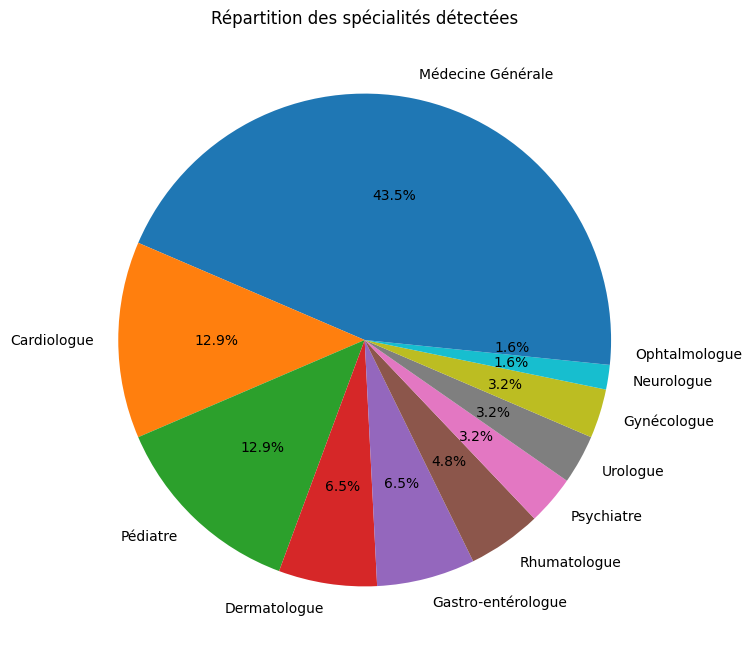

In [39]:
import matplotlib.pyplot as plt

# Supprimer "Spécialité inconnue" avant le graphe
df_plot = df_resultats[df_resultats['specialite_detectee'] != 'Spécialité inconnue']

# Plot camembert
df_plot['specialite_detectee'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title("Répartition des spécialités détectées")
plt.ylabel("")
plt.show()


In [ ]:
# 📦 Installer si besoin
!apt install tesseract-ocr -y
!pip install pytesseract fuzzywuzzy[speedup] openpyxl unidecode

import pytesseract
import pandas as pd
import re
import cv2
from fuzzywuzzy import fuzz, process
from unidecode import unidecode
import os
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# 📥 Charger la liste CNAM officielle
cnam_df = pd.read_excel('/content/LISTE DES MEDICAMENTS CLASSES EN V E I COUVERTS PAR LE REGIME DE BASE18-03-2025.xls')
cnam_medicaments = cnam_df.iloc[:, 0].astype(str).apply(lambda x: unidecode(x.lower().strip())).tolist()

if 'PRIX_PUBLIC' in cnam_df.columns:
    cnam_prices = dict(zip(cnam_medicaments, cnam_df['PRIX_PUBLIC']))
else:
    cnam_prices = {}

# 📋 Nettoyer un texte
def nettoyer_text(text):
    text = text.lower()
    text = unidecode(text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# 🔎 Correction et Matching CNAM
def correction_medicament_cnam(line, cnam_medicaments):
    line_clean = nettoyer_text(line)
    best_match, best_score = process.extractOne(line_clean, cnam_medicaments, scorer=fuzz.partial_ratio)
    if best_score >= 85:
        return best_match, best_score, 'Oui'
    else:
        return 'medicament_inconnu', best_score, 'Non'

# 🚀 Fonction principale OCR + Matching
def analyse_image_cnam(image_path):
    print(f"🖼️ Analyse : {image_path}")
    img = cv2.imread(image_path)
    custom_config = r'--oem 3 --psm 6'
    text = pytesseract.image_to_string(img, config=custom_config)

    lines = text.split('\n')
    produits_detectes = []

    for line in lines:
        line = line.strip()
        if not line:
            continue

        if not re.match(r'^\d{6}', line):
            continue

        best_match, best_score, remboursement = correction_medicament_cnam(line, cnam_medicaments)

        numbers = re.findall(r'\d+[,.]?\d*', line)
        quantity_detected = None
        price_detected = None

        if numbers:
            candidates = [float(n.replace(',', '.')) for n in numbers]
            candidates_sorted = sorted(candidates)

            for num in candidates_sorted:
                if 1 <= num <= 20:
                    quantity_detected = int(num)
                    break

            decimal_candidates = [n for n in candidates if (n % 1 != 0 and 1 <= n <= 500)]
            if decimal_candidates:
                price_detected = round(decimal_candidates[0], 3)
            else:
                for num in sorted(candidates, reverse=True):
                    if 1 <= num <= 500:
                        price_detected = round(num, 3)
                        break

        if quantity_detected and price_detected:
            produits_detectes.append({
                'Médicament': best_match,
                'Prix': f"{price_detected} DT",
                'Quantité': quantity_detected,
                'Remboursable': remboursement
            })

    df = pd.DataFrame(produits_detectes).drop_duplicates()

    if not df.empty:
        anomalies = []
        for _, row in df.iterrows():
            anomaly = []
            if row['Médicament'] == 'medicament_inconnu':
                anomaly.append("Médicament inconnu")
            if float(row['Prix'].split()[0]) > 100:
                anomaly.append("Prix élevé")
            if int(row['Quantité']) > 4:
                anomaly.append("Quantité élevée")

            if row['Médicament'] in cnam_prices:
                prix_reference = cnam_prices[row['Médicament']]
                prix_detecte = float(row['Prix'].replace(' DT',''))
                if prix_detecte > prix_reference * 1.1:
                    anomaly.append("Prix majoré par rapport CNAM")

            anomalies.append(" + ".join(anomaly) if anomaly else "Aucune")

        df['Anomalie détectée'] = anomalies



        return df[['Médicament', 'Prix', 'Quantité', 'Remboursable', 'Anomalie détectée']]
    else:
        print("❌ Aucun médicament détecté proprement.")
        return pd.DataFrame(columns=['Médicament', 'Prix', 'Quantité', 'Remboursable', 'Anomalie détectée'])

# ➡️ Exemple d'utilisation :
image_path = '/content/drive/MyDrive/Divers/Divers_84.jpg'
df_result = analyse_image_cnam(image_path)

# ➡️ Export Excel
output_path = '/content/analyse_cnam_V8_Cleaned.xlsx'
df_result.to_excel(output_path, index=False)

# ➡️ Coloration rouge pour anomalies
wb = load_workbook(output_path)
ws = wb.active
red_fill = PatternFill(start_color='FF9999', end_color='FF9999', fill_type='solid')

for row in ws.iter_rows(min_row=2, min_col=5, max_col=5):
    for cell in row:
        if cell.value and cell.value != "Aucune":
            cell.fill = red_fill

wb.save(output_path)

print(f"\n✅ Export terminé avec résumé et couleurs : {output_path}")

# ➡️ Télécharger automatiquement
from google.colab import files
files.download(output_path)
